### 1.請依照老師影片5-7中，使用pandas_datareader得到 "AAPL" 這間公司股價的所有資料，不用設定資料時間

### 2.取出最後300筆資料

### 3.從這300筆資料，取出收盤價close，並轉成numpy_array讓我們在後面使用

### 4.我們現在要做的，是用前一天的收盤價，預測第二天的收盤價（星期一預測星期二），請依照這個需求，把資料分成題目X(迴歸直線的x座標，表示所有的「前一天收盤價」)，跟答案Y(迴歸直線的y座標，表示所有的「第二天收盤價」) 

### 5.請把題目X，答案Y再分成佔80%的訓練資料跟佔20%的測試資料

### 6.請實際的利用訓練資料和scikit learn跑線性回歸，畫圖，並在得到的迴歸直線上，加上訓練資料的資料點(plt.scatter...)，看看你回歸的結果跟實際結果差多少。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

In [21]:
df = web.DataReader("AAPL", "yahoo")

In [22]:
df = df[-301:] #為了方便在接下來生成各含300筆資料的X及Y，這邊取值改為取最後301筆資料

In [24]:
df #接下來用2018/10/10~2019/12/18的收盤價，預測2018/10/11~2019/12/19的收盤價

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-10,226.350006,216.050003,225.460007,216.360001,41990600.0,212.416153
2018-10-11,219.500000,212.320007,214.520004,214.449997,53124400.0,210.540970
2018-10-12,222.880005,216.839996,220.419998,222.110001,40337900.0,218.061340
2018-10-15,221.830002,217.270004,221.160004,217.360001,30791000.0,213.397919
2018-10-16,222.990005,216.759995,218.929993,222.149994,29184000.0,218.100601
...,...,...,...,...,...,...
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.859985
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600.0,280.410004


In [25]:
a = np.array(df.Close) #取收盤價

In [41]:
X = a[:-1].reshape(-1, 1)
Y = a[1:].reshape(-1, 1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
x = np.arange(120, 300, 0.5)
y = x * model.coef_[0][0] + model.intercept_[0]

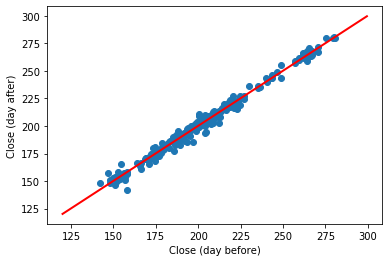

In [64]:
plt.scatter(X_train, Y_train)
plt.plot(x, y, color = 'red', lw = 2)
plt.xlabel("Close (day before)")
plt.ylabel("Close (day after)")
plt.show()